In [1]:
import sys
import os

# Get the absolute path of the project root directory
project_root = os.path.abspath(os.path.join(os.getcwd(), "../../"))


# Add the project root directory to the Python path
sys.path.append(project_root)

In [2]:
import pandas as pd

project_root = os.path.abspath(os.path.join(os.getcwd(), "../../"))

# Define the path to the data directory
data_dir = os.path.join(project_root, 'data')

# Example: Access a specific data file in the data directory
data_file_path = os.path.join(data_dir, 'MAR_per_OAR_for_patients.csv')
df = pd.read_csv(data_file_path)

df['Targ'] = df['MAR'] > 3.5
data = df[['95HD', 'VolDice', 'SurfDist','JaccardIndex', 'APL', 'FNPL', 'FNV', 'Targ', 'OAR', 'patient']]


In [3]:
from AutoML.analyzer import AutoMLAnalyzer

analyzer = AutoMLAnalyzer(data, target_variable='Targ', output_dir='./analysis_output')

analyzer.run()

Mapping file not found checking for outliers in categorical variables...
  - No Outliers found in OAR
  - No Outliers found in patient
  - No Outliers found in Targ
╒═════════════════════════╤════════════════╤═══════════╤═════════════════╕
│                         │                │ Missing   │ Overall         │
╞═════════════════════════╪════════════════╪═══════════╪═════════════════╡
│ n                       │                │           │ 380             │
├─────────────────────────┼────────────────┼───────────┼─────────────────┤
│ 95HD, mean (SD)         │                │ 0         │ 6.2 (21.9)      │
├─────────────────────────┼────────────────┼───────────┼─────────────────┤
│ VolDice, mean (SD)      │                │ 0         │ 0.8 (0.1)       │
├─────────────────────────┼────────────────┼───────────┼─────────────────┤
│ SurfDist, mean (SD)     │                │ 0         │ 1.3 (1.9)       │
├─────────────────────────┼────────────────┼───────────┼─────────────────┤
│ JaccardI

In [4]:
from AutoML.trainer import AutoMLSupervised

In [5]:
trainer = AutoMLSupervised(task='classifier', search='random', cv=3, config_path='/home/oem/Documents/CDI/AutoML/configs/config.yaml')

In [6]:
trainer.fit(data, 'Targ', exclude=['OAR', 'patient',], stratify_on='OAR', n_iter=5)

Event rates: 0.592 (train) 0.579 (test)
Train/test: 304/76

Iterating search through 30 hyperparameters for logr.

Iterating search through 20.0 hyperparameters for logr_pen.

Iterating search through 8640 hyperparameters for boost_c.

Iterating search through 1260 hyperparameters for rf_c.

Iterating search through 720 hyperparameters for tree_c.

Iterating search through 80 hyperparameters for svc.

Iterating search through 96 hyperparameters for mlp_c.

Iterating search through 30 hyperparameters for knn_c.


/home/oem/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/oem/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/oem/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


<< logr_pen >> -- took 0.01370s to refit.
+-------------------+-------------+------------+
|      Metric       | Train Score | Test Score |
+-------------------+-------------+------------+
|     accuracy      |   0.6086    |   0.5921   |
| average_precision |   0.7020    |   0.6297   |
|      recall       |   0.9611    |   0.9773   |
|        f1         |   0.7441    |   0.7350   |
|      roc_auc      |   0.5876    |   0.5572   |
+-------------------+-------------+------------+
<< logr >> -- took 0.00969s to refit.
+-------------------+-------------+------------+
|      Metric       | Train Score | Test Score |
+-------------------+-------------+------------+
|     accuracy      |   0.5526    |   0.5263   |
| average_precision |   0.6758    |   0.6182   |
|      recall       |   0.5778    |   0.5682   |
|        f1         |   0.6047    |   0.5814   |
|      roc_auc      |   0.5833    |   0.5401   |
+-------------------+-------------+------------+
<< tree_c >> -- took 0.00282s to refit

/home/oem/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


<< mlp_c >> -- took 2.88653s to refit.
+-------------------+-------------+------------+
|      Metric       | Train Score | Test Score |
+-------------------+-------------+------------+
|     accuracy      |   0.6776    |   0.6316   |
| average_precision |   0.8037    |   0.6704   |
|      recall       |   0.8833    |   0.8864   |
|        f1         |   0.7644    |   0.7358   |
|      roc_auc      |   0.7435    |   0.6580   |
+-------------------+-------------+------------+
<< rf_c >> -- took 0.34846s to refit.
+-------------------+-------------+------------+
|      Metric       | Train Score | Test Score |
+-------------------+-------------+------------+
|     accuracy      |   0.7467    |   0.6711   |
| average_precision |   0.8793    |   0.7717   |
|      recall       |   0.9278    |   0.8636   |
|        f1         |   0.8127    |   0.7525   |
|      roc_auc      |   0.8335    |   0.6957   |
+-------------------+-------------+------------+
<< boost_c >> -- took 0.34677s to refit.


In [7]:
trainer.best_models

{'logr_pen': LogisticRegression(C=0.1),
 'logr': LogisticRegression(C=0.01, class_weight='balanced'),
 'tree_c': DecisionTreeClassifier(class_weight='balanced', max_depth=7,
                        max_features='log2', min_samples_leaf=4),
 'knn_c': KNeighborsClassifier(n_neighbors=9, p=3),
 'svc': SVC(C=0.1, kernel='linear', probability=True),
 'mlp_c': MLPClassifier(alpha=0.001, hidden_layer_sizes=[128]),
 'rf_c': RandomForestClassifier(max_depth=3, max_features='log2', min_samples_leaf=3,
                        min_samples_split=4, n_estimators=96),
 'boost_c': GradientBoostingClassifier(criterion='squared_error', learning_rate=0.01,
                            loss='exponential', max_depth=7, max_features='sqrt',
                            min_samples_leaf=5, n_estimators=125,
                            subsample=0.75)}

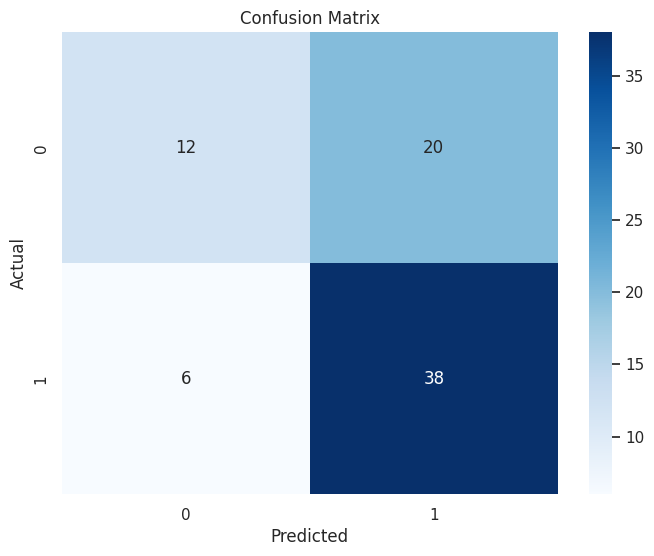

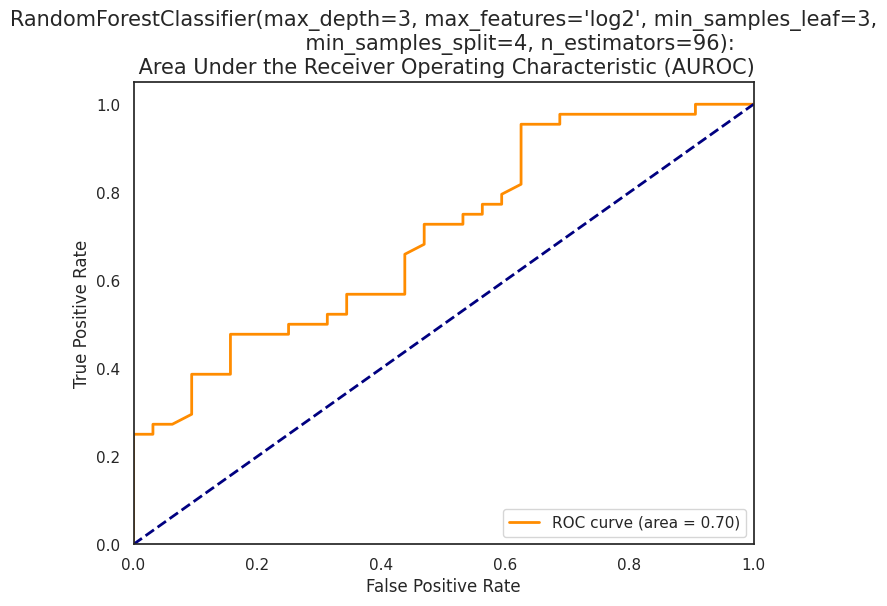

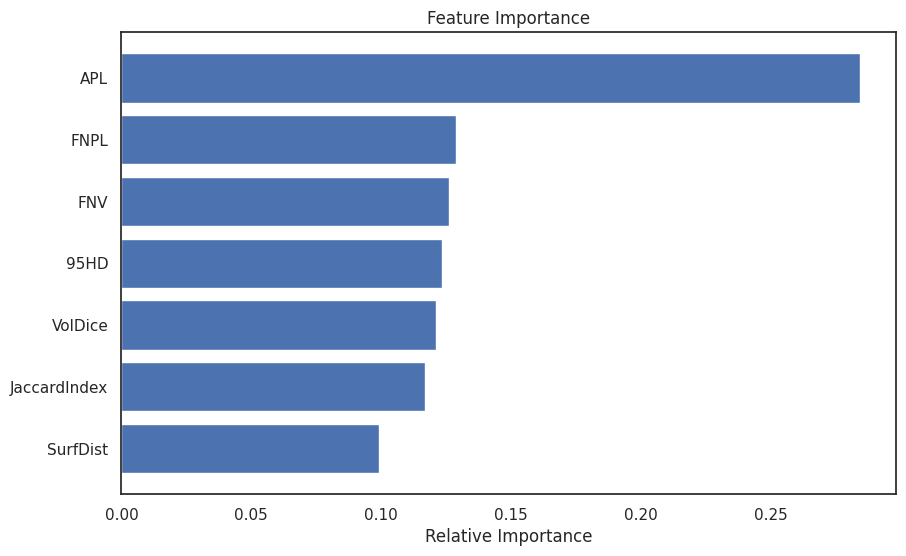

In [8]:
trainer.plot_results()